In [1]:
import pandas as pd # importing pandas library 

In [2]:
startup = pd.read_csv("50_Startups.csv") #dataframe -> startup

In [3]:
startup.head() #shows first five rows

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup.info() #schema of dataset 'startup'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
numeric_df = startup.select_dtypes(include=['number'])  # Select only numeric columns
c = numeric_df.corr()

In [8]:
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# EDA ON DATASET

#Exploratory Data Analysis - Correlation matrix

In [9]:
import seaborn as sns # data visualization library 
import matplotlib.pyplot as plt

<Axes: >

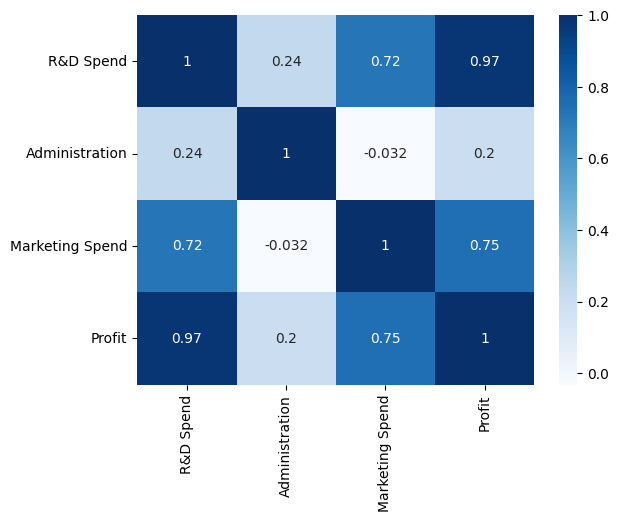

In [11]:
sns.heatmap(c,annot=True,cmap='Blues')

# Outliners detection in the target variable

box-and-whisker plot to visualize the distribution of "Profit" variable

Text(0.5, 0, 'Continuous Variable')

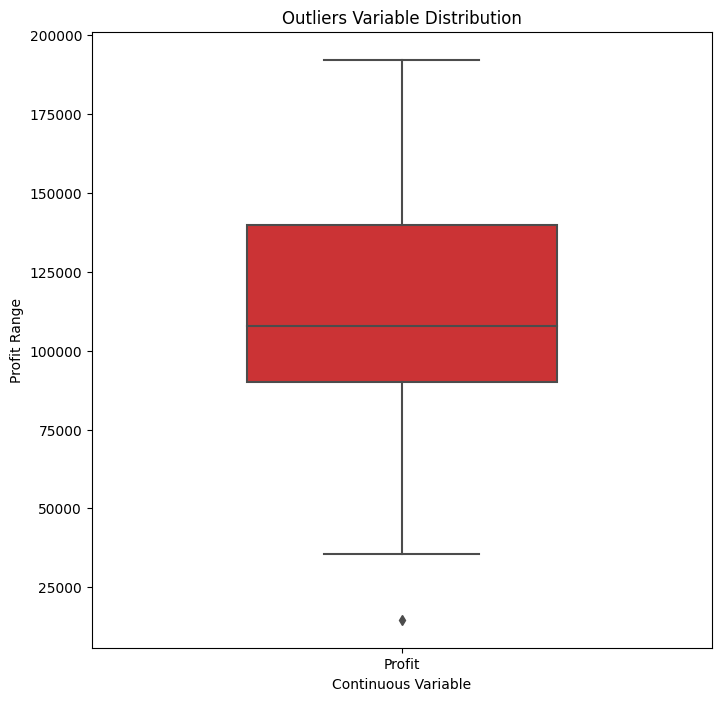

In [12]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8] # specifying a figure size of 8x8 inches for the plot.
sns.boxplot(data=startup[outliers], orient="v", palette="Set1" , width=0.5) # orient = "v" : vertical boxplot , 
                                                                            # orient = "h" : hotrizontal boxplot
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

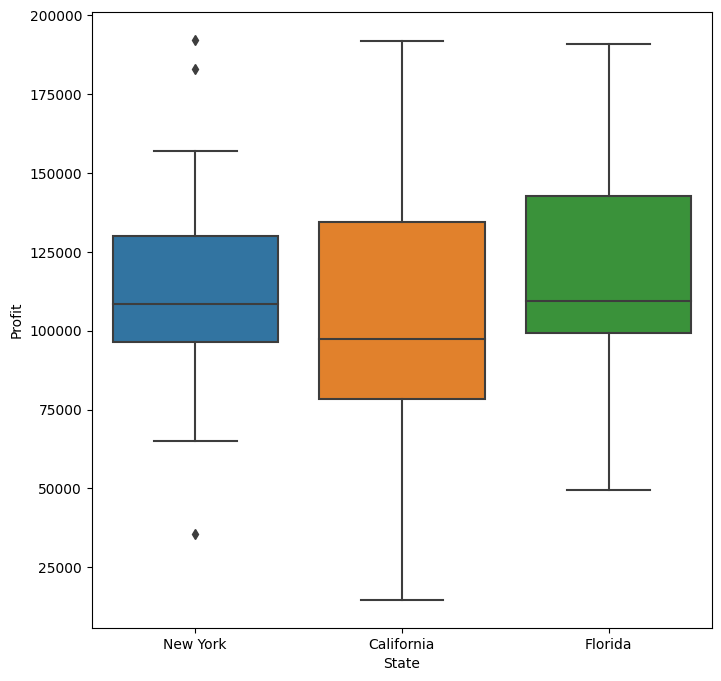

In [14]:
sns.boxplot(x = 'State', y = 'Profit', data = startup)
plt.show()

# Histogram on Profit

sns.histplot(startup['Profit'],bins=5,kde=True)
plt.show()

The average profit (which is 100k) is the most frequent i.e. this should be in the category of distribution plot.

# Pair plot

array([[<Axes: xlabel='R&D Spend', ylabel='R&D Spend'>,
        <Axes: xlabel='Administration', ylabel='R&D Spend'>,
        <Axes: xlabel='Marketing Spend', ylabel='R&D Spend'>,
        <Axes: xlabel='Profit', ylabel='R&D Spend'>],
       [<Axes: xlabel='R&D Spend', ylabel='Administration'>,
        <Axes: xlabel='Administration', ylabel='Administration'>,
        <Axes: xlabel='Marketing Spend', ylabel='Administration'>,
        <Axes: xlabel='Profit', ylabel='Administration'>],
       [<Axes: xlabel='R&D Spend', ylabel='Marketing Spend'>,
        <Axes: xlabel='Administration', ylabel='Marketing Spend'>,
        <Axes: xlabel='Marketing Spend', ylabel='Marketing Spend'>,
        <Axes: xlabel='Profit', ylabel='Marketing Spend'>],
       [<Axes: xlabel='R&D Spend', ylabel='Profit'>,
        <Axes: xlabel='Administration', ylabel='Profit'>,
        <Axes: xlabel='Marketing Spend', ylabel='Profit'>,
        <Axes: xlabel='Profit', ylabel='Profit'>]], dtype=object)

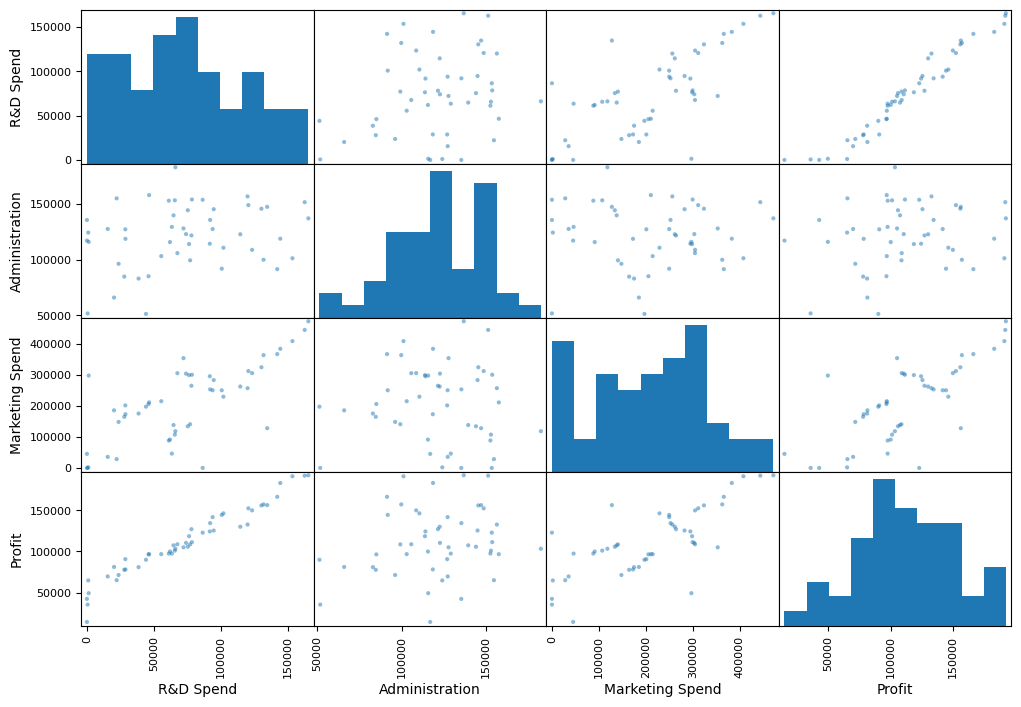

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["R&D Spend","Administration","Marketing Spend","Profit"]
scatter_matrix(startup[attributes],figsize=(12,8))

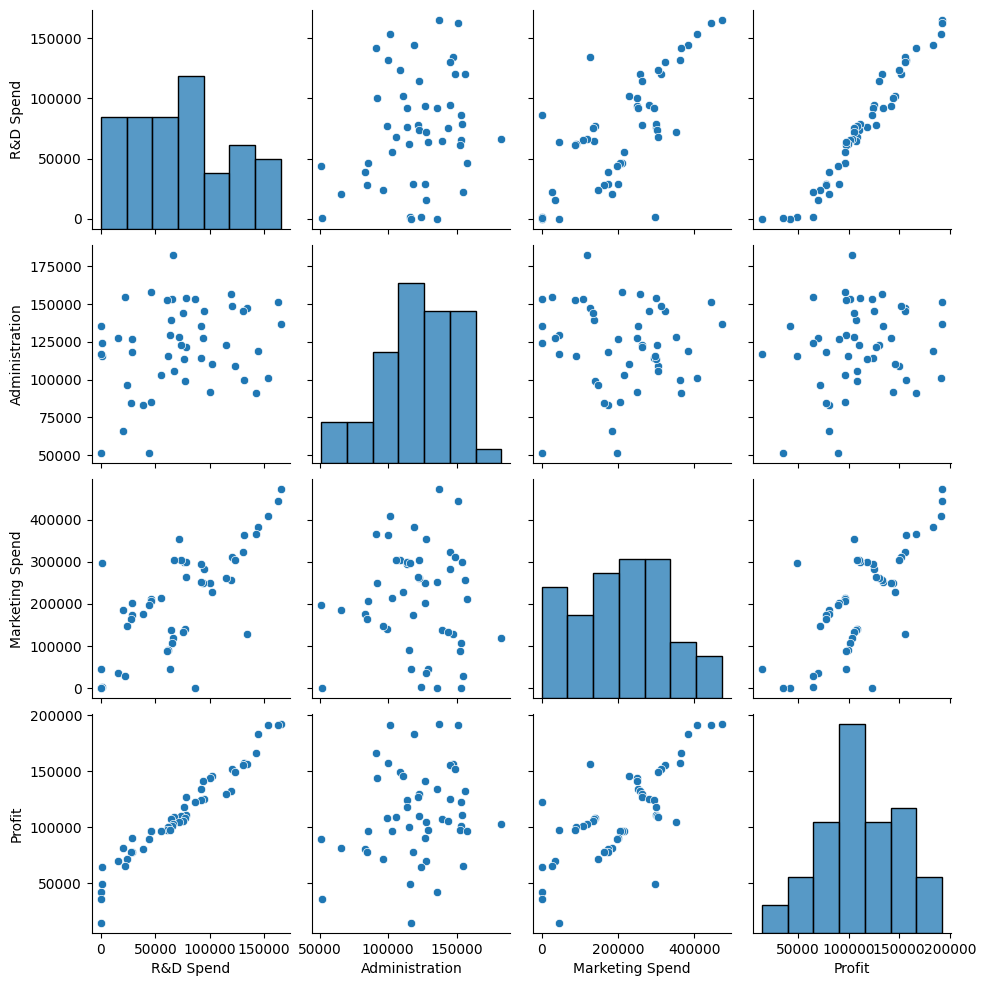

In [17]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(startup)
plt.show()

# Model Development

In [18]:
import numpy as np

In [19]:
print(startup.columns)  # Print column names
print(startup.head()) 

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [20]:
# spliting Dataset in Dependent & Independent Variables
X = startup.iloc[:, :-1].values #X is assigned the values of the independent variables (features).
                                #These are the variables that you will use to predict or explain the dependent variable (target).
y = startup.iloc[:, 4].values #y is assigned the values of the dependent variable (target).
                                #This is the variable you want to predict or analyze based on the independent variables.
  

Label encoder

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:,3])
X1 = pd.DataFrame(X)
X1.head()

,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


Train-Test Spitting

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
x_train

array([[130298.13, 145530.06, 323876.68, 1],
       [119943.24, 156547.42, 256512.92, 1],
       [1000.23, 124153.04, 1903.93, 2],
       [542.05, 51743.15, 0.0, 2],
       [65605.48, 153032.06, 107138.38, 2],
       [114523.61, 122616.84, 261776.23, 2],
       [61994.48, 115641.28, 91131.24, 1],
       [63408.86, 129219.61, 46085.25, 0],
       [78013.11, 121597.55, 264346.06, 0],
       [23640.93, 96189.63, 148001.11, 0],
       [76253.86, 113867.3, 298664.47, 0],
       [15505.73, 127382.3, 35534.17, 2],
       [120542.52, 148718.95, 311613.29, 2],
       [91992.39, 135495.07, 252664.93, 0],
       [64664.71, 139553.16, 137962.62, 0],
       [131876.9, 99814.71, 362861.36, 2],
       [94657.16, 145077.58, 282574.31, 2],
       [28754.33, 118546.05, 172795.67, 0],
       [0.0, 116983.8, 45173.06, 0],
       [162597.7, 151377.59, 443898.53, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [44069.95, 51283.14, 197029.42, 0],
       [77044.01, 99281.34, 140574.81, 2],
       [1346

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [28]:
y_pred = model.predict(x_test)
y_pred

array([3.17622841e+09, 4.97778267e+09, 4.95614430e+09, 1.81775317e+09,
       7.66794313e+09, 4.33059561e+09, 1.59282888e+09, 2.84003690e+09,
       4.19454898e+09, 7.05196822e+09, 3.10186656e+09, 2.68476111e+09,
       3.56819145e+09, 2.78039338e+09, 4.83730794e+09])

In [29]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data -19262038161.52307
Model Score/Performance on Training data 0.9515496105627431
